In [ ]:
%pip install numpy
%pip install pandas

In [2]:
import numpy as np 
import pandas as pd
import os

In [3]:
train_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train"
val_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train"
test_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test"

In [2]:
print("Train directory - real faces: ",len(os.listdir(train_dir+"/real")))
print("Train directory - fake faces: ",len(os.listdir(train_dir+"/fake")))

print("\nVal directory - real faces: ",len(os.listdir(val_dir+"/real")))
print("Val directory - fake faces: ",len(os.listdir(val_dir+"/fake")))

print("\nTest directory - real faces: ",len(os.listdir(test_dir+"/real")))
print("Test directory - fake faces: ",len(os.listdir(test_dir+"/fake")))

 
Train directory - real faces:  50000
Train directory - fake faces:  50000

Val directory - real faces:  10000
Val directory - fake faces:  10000

Test directory - real faces:  10000
Test directory - fake faces:  10000


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
)

batch_size = 32
image_height = 224
image_width = 224

train =  "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train"
validation =  "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid"
test =  "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test"

train_generator = datagen.flow_from_directory(
    train,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

validation_generator = datagen.flow_from_directory(
    validation,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

test_generator = datagen.flow_from_directory(
    test,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

2024-03-21 10:36:21.900662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 10:36:21.900780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 10:36:22.211182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
train_class_indices = train_generator.class_indices
validation_class_indices = validation_generator.class_indices
test_class_indices = test_generator.class_indices

print("Train Class Indices:", train_class_indices)
print("Validation Class Indices:", validation_class_indices)
print("Test Class Indices:", test_class_indices)


Train Class Indices: {'fake': 0, 'real': 1}
Validation Class Indices: {'fake': 0, 'real': 1}
Test Class Indices: {'fake': 0, 'real': 1}


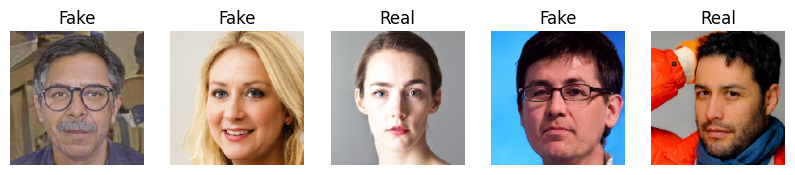

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(5):
    batch_images, batch_labels = next(train_generator)
    image = batch_images[0]
    label = batch_labels[0]
    if label[1] == 1:
        label_str = 'Real' 
    else:
        label_str = 'Fake'
    plt.subplot(1,5,i+1)
    plt.imshow(image)
    plt.title(f"{label_str}")
    plt.axis('off')
plt.show()

## VGG16 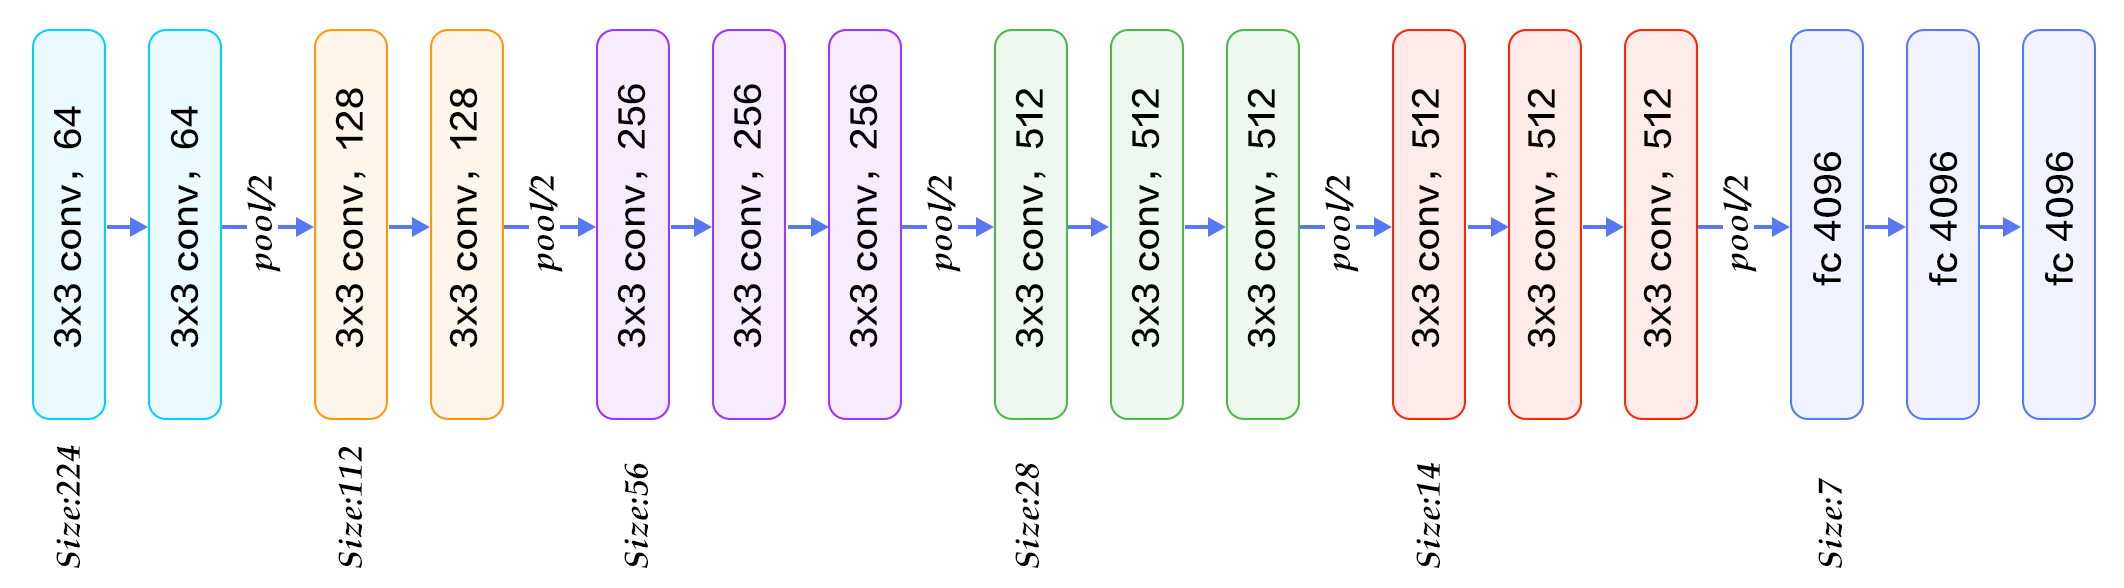

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(64, input_shape=(image_height, image_width, 3), activation='relu',kernel_size=3))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, strides=2))
model.add(BatchNormalization())


model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, strides=2))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
# model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, strides=2))

# model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
# model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
# model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(2, strides=2))
model.add(Flatten())


model.add(Dense(1024,activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation = 'softmax'))

In [9]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def discriminator(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.Dropout(0.25))

#     model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.Dropout(0.25))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(128))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.Dropout(0.25))

#     model.add(layers.Dense(num_classes, activation='softmax'))

#     return model

# # Example usage:
# input_shape=(image_height, image_width, 3)  # Input shape for 28x28 grayscale images
# num_classes = 2  # Number of classes in your classification task
# model = discriminator(input_shape, num_classes)


In [10]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=6,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',  
        factor=0.5,
        patience=2,
        verbose=1,
        mode='min',  
        min_lr=0.0001
    )
]

model.compile(
    optimizer=tf.keras.optimizers.SGD(),  
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator)//32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)//32,
    batch_size = 32,
    callbacks = callbacks)

Epoch 1/50


I0000 00:00:1711017585.464511     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 [==============================] - 67s 417ms/step - loss: 0.8061 - accuracy: 0.5783 - val_loss: 0.6970 - val_accuracy: 0.4770 - lr: 0.0100
Epoch 2/50
97/97 [==============================] - 42s 425ms/step - loss: 0.6300 - accuracy: 0.6575 - val_loss: 0.6924 - val_accuracy: 0.5016 - lr: 0.0100
Epoch 3/50
97/97 [==============================] - 43s 443ms/step - loss: 0.5944 - accuracy: 0.6785 - val_loss: 0.7107 - val_accuracy: 0.5049 - lr: 0.0100
Epoch 4/50
97/97 [==============================] - 42s 427ms/step - loss: 0.5865 - accuracy: 0.6968 - val_loss: 0.6566 - val_accuracy: 0.6349 - lr: 0.0100
Epoch 5/50
97/97 [==============================] - 42s 432ms/step - loss: 0.5525 - accuracy: 0.7120 - val_loss: 0.6318 - val_accuracy: 0.6497 - lr: 0.0100
Epoch 6/50
97/97 [==============================] - 42s 426ms/step - loss: 0.5499 - accuracy: 0.7262 - val_loss: 0.6944 - val_accuracy: 0.5707 - lr: 0.0100
Epoch 7/50
97/97 [==============================] - 43s 436ms/step - loss: 

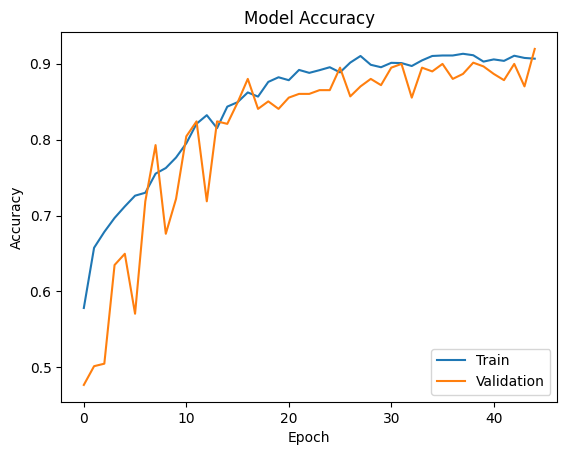

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

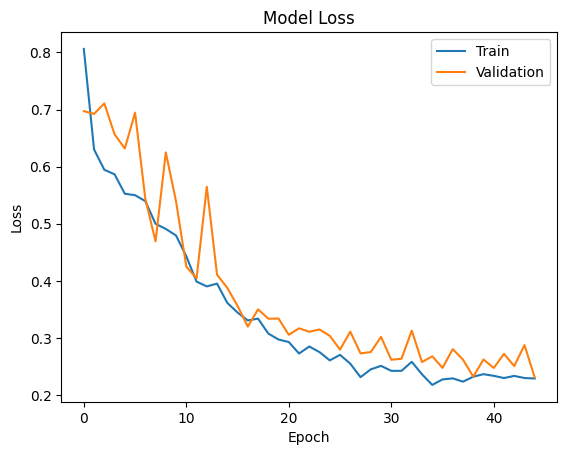

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
model.save_weights('model_weights.h5')
# model.save('res18_full_model.h5')

In [15]:
metrics = model.evaluate(test_generator)
print("Accuracy: ",metrics[1])
print("Loss: ", metrics[0])

625/625 [==============================] - 198s 316ms/step - loss: 0.2488 - accuracy: 0.8994
Accuracy:  0.899399995803833
Loss:  0.24879750609397888
